#### Задание 1
Вычислить вероятность выживания, если пассажиру:
- от 0 до 25 лет
- от 25 до 50 лет
- от 50 лет и старше

In [35]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# Фильтруем датафрейм в новые переменные для каждого из условий
df1 = df[df['Age'] < 25]
df2 = df[(df['Age'] >= 25) & (df['Age'] < 50)]
df3 = df[df['Age'] >= 50]

In [20]:
# Посчитаем, сколько выживших в каждой возрастной группе
sum_1 = df1['Survived'].sum()
sum_2 = df2['Survived'].sum()
sum_3 = df3['Survived'].sum()

In [23]:
# Посчитаем, сколько всего было пассажиров каждой возрастной группы
rows_count1 = df1.shape[0]
rows_count2 = df2.shape[0]
rows_count3 = df3.shape[0]

In [25]:
# Посчитаем вероятность выживания в каждой возрастной группе (благоприятные исходы на всевозможные)
live1 = sum_1 / rows_count1
live2 = sum_2 / rows_count2
live3 = sum_3 / rows_count3
print ('В группе людей до 25 лет вероятность выжить: ', round(live1, 3))
print ('В группе людей от 25 до 50 лет вероятность выжить: ', round(live2, 3))
print ('В группе людей старше 50 лет вероятность выжить: ', round(live3, 3))

В группе людей до 25 лет вероятность выжить:  0.424
В группе людей от 25 до 50 лет вероятность выжить:  0.401
В группе людей старше 50 лет вероятность выжить:  0.365


#### Задание 2
Вычислить с какой вероятностью пассажир женского пола, если известно, что он выжил (использовать теорему Байеса)

In [55]:
# Создадим дополнительные столбцы для расчетов и фильтров
import numpy as np
df['Female'] = np.where(df['Sex'] == 'female', 1, 0)
df['Male'] = np.where(df['Sex'] == 'male', 1, 0)
df['Survived_women'] = np.where((df['Sex'] == 'female') & (df['Survived'] == 1), 1, 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male,Survived_women
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0


In [57]:
total_women = df['Female'].sum()
total_men = df['Male'].sum()
check = total_women + total_men
women_survived = df['Survived_women'].sum() 
total_survived = df['Survived'].sum()

print('Всего женщин на борту: ', total_women)
print('Всего мужчин на борту: ', total_men)
print('Всего людей на борту: ', check)
print('Всего выживших людей на борту: ', total_survived)
print('Всего выживших женщин на борту: ', women_survived)


Всего женщин на борту:  314
Всего мужчин на борту:  577
Всего людей на борту:  891
Всего выживших людей на борту:  342
Всего выживших женщин на борту:  233


In [63]:
# Рассчитываем вероятность women, survived_women, survived
p_women = round(total_women / check, 3)
p_survived = round(total_survived / check, 3)
p_SW = round(women_survived / total_women, 3)

P = p_women * women_survived / total_survived
print ('Вероятность того, что пассажир женского пола: ', p_women)
print ('Вероятность того, что пассажир выживет: ', p_survived)
print('Вероятность того, что выживет женщина:', p_SW)

print('Ответ к задаче: вероятность того, что выживший пассажир женского пола: ', round(P,4) )

Вероятность того, что пассажир женского пола:  0.352
Вероятность того, что пассажир выживет:  0.384
Вероятность того, что выживет женщина: 0.742
Ответ к задаче: вероятность того, что выживший пассажир женского пола:  0.2398


#### Задание 3

Закон распределения задается функцией плотности

$ f(x) = \lambda e^{-\lambda x}, x > 0 $

$ f(x) = 0, x <= 0 $

Найти вероятность того, что событие произойдет при x∈[1,2]

#### Решение
Т.к. функция непрерывная, то вероятность попадания в интервал x∈[1,2] найдем с помощью определенного интеграла, но для начала необходимо определить, для каких значений параметра $\lambda$ имеет смысл производить интегрирование. Для этого проверим, для каких $\lambda$ будут выполнятся свойства вероятности: 

1. Ненегативность - для всех значений x функция плотности вероятности должна быть >=  0
2. Нормировка - интеграл вероятностей по всему пространству измеререний = 1

Ненегативность:    
Данное свойство выполняется при x > 0 (по области определения функции)

Нормировка:  
$\int^{+\infty}_{-\infty}{f(x)}{\rm d}x = \int^{0}_{-\infty}{f(x)}{\rm d}x + \int^{+\infty}_{0}{f(x)}{\rm d}x$  
При значении аргумента x < 0 значение функции равно 0, т.е.:
$\int^{+\infty}_{-\infty}{f(x)}{\rm d}x = 0 + \int^{+\infty}_{0}{\lambda e^{-\lambda x}}{\rm d}x = \int^{+\infty}_{0}{\lambda e^{-\lambda x}}{\rm d}x$  

(0.0, 2.0)

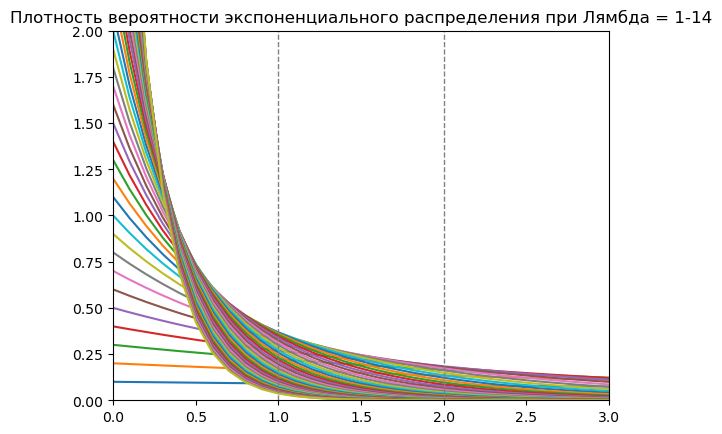

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Диапазон входных значений
x_arr = np.arange(0, 15, 0.1)

# Диапазон лямбда
lambdas = np.arange(0.1, 5, 0.1)

# Задаем функцию
def expon(x, lambd):
    return lambd*np.exp(-lambd*x)

for lambd in lambdas:
    y = expon(x_arr, lambd)
    plt.plot(x_arr, y, label = r'$\lambda$' + '=' + str(lambd)) ;

plt.axvline(x=1, color = 'gray', linestyle='--', linewidth=1) ;
plt.axvline(x=2, color = 'gray', linestyle='--', linewidth=1) ;

plt.title('Плотность вероятности экспоненциального распределения при Лямбда = 1-14') ;
plt.xlim(0, 3)
plt.ylim(0, 2)

Проверяем свойства вероятности:

In [55]:
from scipy.integrate import quad

# Задаем функцию плотности вероятности экспоненциального распределения
def exponential_pdf(x, lambda_param):
    return lambda_param * np.exp(-lambda_param * x)

# Задаем случайный перечень лямбд
lambda_param = np.arange(-5, 6, 1)

# Проверка свойств
def check_probability_properties(lambda_param):
    results = {}
    for lam in lambda_param:
        if lam > 0:
            # Ненегативность
            non_negativity = True     # По определению функции
            # Нормировка
            integral_value, _ = quad(exponential_pdf, 0, np.inf, args=(lam,))
            results[lam] = non_negativity and np.isclose(integral_value, 1)  
        else:
            results[lam] = False
    return results

properties = check_probability_properties(lambda_param)

for i in properties:
    print(f'Для лямбда = {i}: {properties[i]}')

Для лямбда = -5: False
Для лямбда = -4: False
Для лямбда = -3: False
Для лямбда = -2: False
Для лямбда = -1: False
Для лямбда = 0: False
Для лямбда = 1: True
Для лямбда = 2: True
Для лямбда = 3: True
Для лямбда = 4: True
Для лямбда = 5: True


Видно, что свойства вероятности выполняются для значений лямбда > 0    
Находим вероятность для положительных лямбда значений

Наибольшая вероятность =  0.25 при лямбда =  0.7


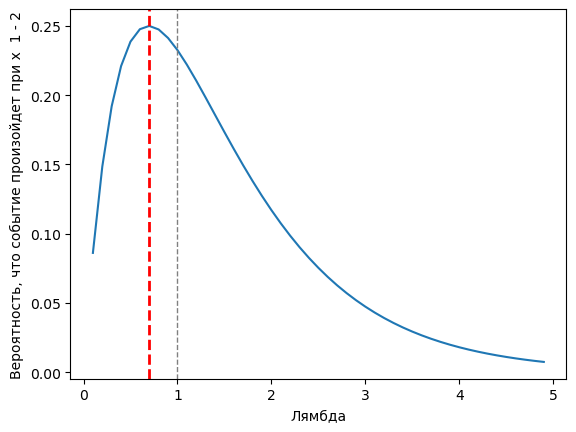

In [56]:
lambda_param = np.arange(0.1, 5, 0.1)
#Диапазон интегрирования
lower_bound = 1
upper_bound = 2

# Словарь для хранения вероятностей для разных лямбд
probabilities = {}

# Вычисляем вероятность для каждого значения лямбда:
for lam in lambda_param:
    probability, _ = quad(exponential_pdf, lower_bound, upper_bound, args=(lam, ))
    probabilities[lam] = probability

# Проверим, есть ли какая-либо зависимость между вероятностью и показателем лямбды
lambds = list(probabilities.keys())
probs = list(probabilities.values())

plt.plot(lambds, probs) ;
plt.xlabel('Лямбда')
plt.ylabel('Вероятность, что событие произойдет при x  1 - 2') ;
plt.axvline(x=1, color = 'gray', linestyle='--', linewidth=1) ;

#Определим, при какой лямбды вероятность попадания в интервал наибольшая
max_index = np.argmax(probs)
print('Наибольшая вероятность = ', round(probs[max_index],2), 'при лямбда = ', round(lambds[max_index],2))
plt.axvline(x=lambds[max_index], color = 'red', linestyle='--', linewidth=2) ;

Видно, что наибольшая вероятность, что событие произойдет при x∈[1,2] наблюдается при $\lambda$ = 0.7